<a href="https://colab.research.google.com/github/karima33/python_projects/blob/main/check5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data set 
data_ = pd.read_csv("/content/titanic-passengers.csv", sep=';')
data_.shape


(891, 12)

In [3]:
#The head of the dataset
data_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
#Showing  the columns 
data_.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
#Some general informations about the data columns and values like the types 
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
#Summary statistics of the numerical  columns
data_.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#Summary statistics of the non numerical  columns
data_.describe(exclude=np.number)

,Survived,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,2,891,2,681,147,3
top,No,"Collander, Mr. Erik Gustaf",male,CA. 2343,G6,S
freq,549,1,577,7,4,644


In [8]:
#finding missing informations / values
data_.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Replacing missing values 
data_['Age'] = data_['Age'].fillna(data_['Age'].mean())
data_['Cabin'] = data_['Cabin'].fillna(data_['Cabin'].mode()[0])
data_['Embarked'] = data_['Embarked'].fillna(data_['Embarked'].mode()[0])

In [10]:
#Checking again null values
data_.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

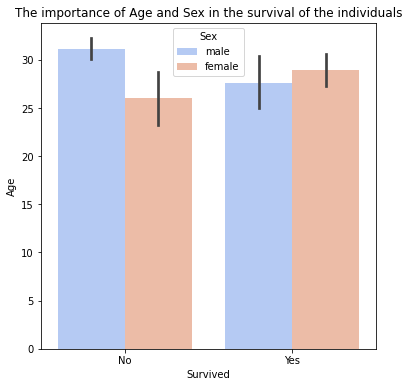

In [11]:
#The importance of Age and Sex in the survival of the individuals
plt.figure(figsize=(6,6))
sns.barplot(y='Age', x='Survived',data=data_,hue='Sex',palette = "coolwarm")

plt.xlabel("Survived")
plt.ylabel("Age")
plt.title("The importance of Age and Sex in the survival of the individuals")
plt.show()

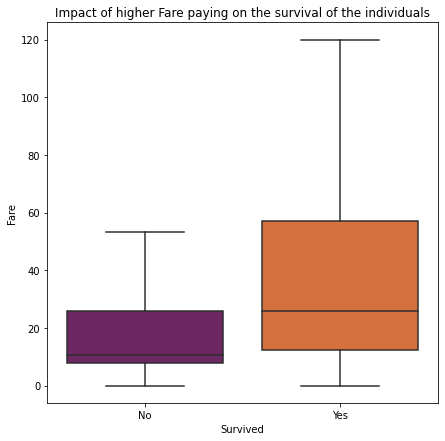

In [12]:
#Impact of higher Fare paying on the survival of the individuals
plt.figure(figsize=(7,7))
sns.boxplot(x='Survived',y='Fare',data=data_, showfliers = False,palette='inferno')
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.title("Impact of higher Fare paying on the survival of the individuals")
plt.show()

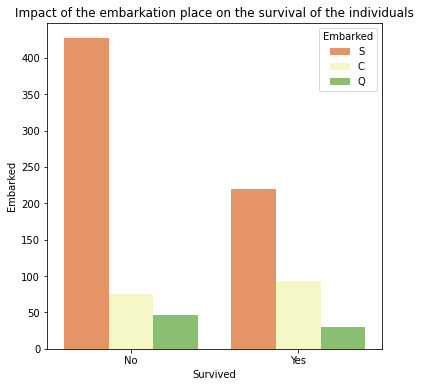

In [13]:
#Impact of the embarkation place on the survival of the individuals
plt.figure(figsize=(6,6))
sns.countplot(x='Survived',data=data_, hue='Embarked',palette='RdYlGn')
plt.xlabel("Survived")
plt.ylabel("Embarked")
plt.title("Impact of the embarkation place on the survival of the individuals")
plt.show()

In [14]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

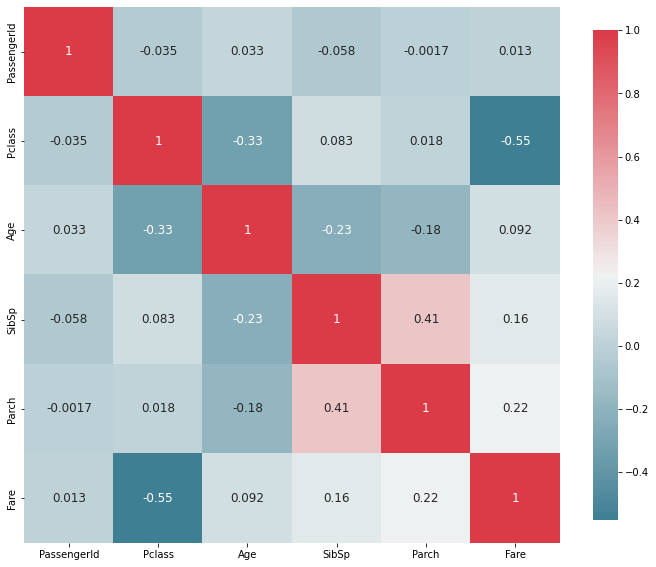

In [15]:
plot_correlation_map( data_ )

The **plot_correlation_map** function is a function that has been created in order to plot a heatmap or a correlation map, Since heatmaps provide us with an easy tool to understand the correlation between two entities, they can be used to visualize the correlation among the features of a machine learning model. This may help us in feature selection by eliminating highly correlated features.

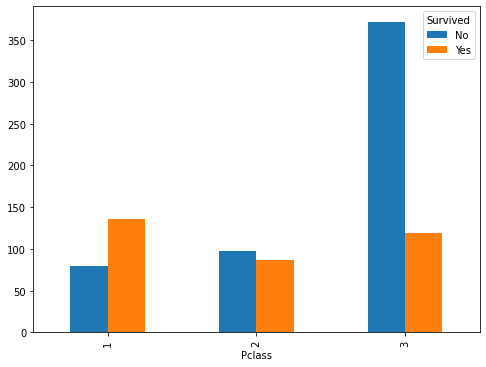

In [16]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 
data_.groupby(['Pclass', 'Survived'] )['Survived'].count().unstack(1).plot.bar(figsize=(8, 6))

In [17]:
#creatin the new column called Title which contains the appropriate Title for each individual
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
def get_titles():
    #  extraction of  the title from each name
    data_['Title'] = data_['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    #  mapping each title
    data_['Title'] = data_.Title.map(Title_Dictionary)
   
    return data_

In [18]:
data_ = get_titles()
data_.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


In [19]:
#Dropping the name column
data_.drop(['Name'], axis=1, inplace = True)

In [20]:
data_.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,male,28.0,0,0,248740,13.0000,B96 B98,S,Mr
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,male,20.0,0,0,350050,7.8542,B96 B98,S,Mr
3,568,No,3,female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr


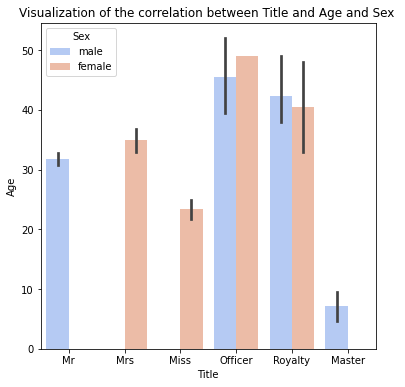

In [21]:
plt.figure(figsize=(6,6))
sns.barplot(y='Age', x='Title', hue= 'Sex', data=data_,palette = "coolwarm")
plt.xlabel("Title")
plt.ylabel("Age")
plt.title("Visualization of the correlation between Title and Age and Sex ")
plt.show()

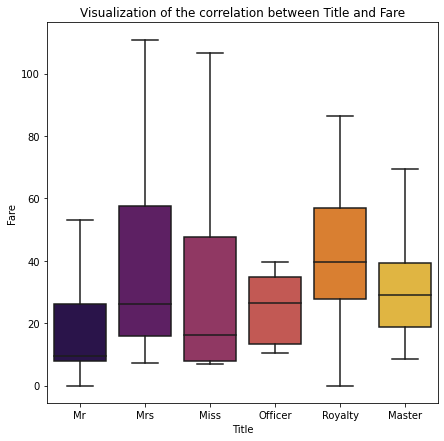

In [22]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Title',y='Fare',data=data_, showfliers = False,palette='inferno')
plt.xlabel("Title")
plt.ylabel("Fare")
plt.title("Visualization of the correlation between Title and Fare")
plt.show()

In [23]:
#reate FamilySize feature
data_['FamilySize'] = data_['SibSp'] + data_['Parch']

In [24]:
data_.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,No,2,male,28.0,0,0,248740,13.0000,B96 B98,S,Mr,0
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr,0
2,641,No,3,male,20.0,0,0,350050,7.8542,B96 B98,S,Mr,0
3,568,No,3,female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs,4
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,1


As we know that during  the Sinking of the Titanic the rescue process has followed the rule "children and women first".  The solo travelers had a much higher chance to die than to survive.
In addition, people traveling in families of sevral members actually had a relatively high chance to survive this is why the FamilySize feature  has a great impact on survival rate on the Titanic.


# Logistic  regression

The PassengerID is unique value for each passenger this feature doesn't affect our target so we can delete it

In [25]:
#selecting all the rows and all columuns  whithout the  PassengerID column
df= data_.iloc[:,1:]

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,No,2,male,28.0,0,0,248740,13.0000,B96 B98,S,Mr,0
1,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mr,0
2,No,3,male,20.0,0,0,350050,7.8542,B96 B98,S,Mr,0
3,No,3,female,29.0,0,4,349909,21.0750,B96 B98,S,Mrs,4
4,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr,1


In [27]:
#Transforming our target  into  numerical  values
df['Survived'].replace(to_replace='Yes', value=1, inplace=True)
df['Survived'].replace(to_replace='No',  value=0, inplace=True)

In [28]:
#Transforming our categorigal features  into  numerical  values using get_dummies (dummy variable)
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Ticket_110152,...,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,0,2,28.0,0,0,13.0000,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0,3,25.0,0,0,7.6500,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,3,20.0,0,0,7.8542,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,0,3,29.0,0,4,21.0750,4,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,1,31.0,1,0,52.0000,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [29]:
X= df_dummies.drop(columns = ['Survived'], axis=1)#features 
y =df_dummies['Survived'] #target

In [30]:
#Spliting or data into training  data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [31]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000) # our model
log_reg.fit(X_train, y_train) #training or fitting our model

LogisticRegression(max_iter=1000)

In [32]:
#test and validation of our model  
y_pred = log_reg.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1])

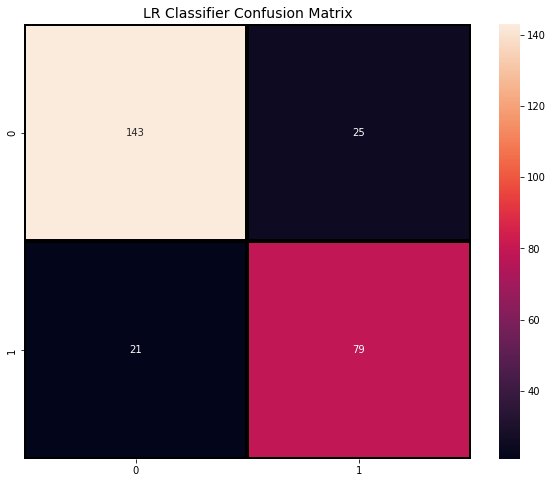

In [33]:
#Confusion  matrix
from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", linecolor="k", linewidths=3)

plt.title("LR Classifier Confusion Matrix", fontsize=14)
plt.show()

In [34]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       168
           1       0.76      0.79      0.77       100

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [35]:
#
from sklearn.metrics import accuracy_score
X_train_prediction = log_reg.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score on training data = ', training_data_accuracy)

y_pred = log_reg.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score on test data = ', test_data_accuracy)

Accuracy score on training data =  0.8972712680577849
Accuracy score on test data =  0.8283582089552238


The AUC-ROC is an essential technique to determine and evaluate the performance of a created classification model. Performing this test only increases the value and correctness of a model and in turn, helps improve its accuracy.  Using this method helps us summarize the actual trade-off between the true positive rate and the predictive value for a predictive model using different probability thresholds which is an important aspect of classification problems

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:


*  True Positive Rate
*  False Positive Rate



True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:


\begin{align}
        TPR=\frac{TP}{TP+FN}
\end{align}

False Positive Rate (FPR) is defined as follows:

\begin{align}
        FPR=\frac{FP}{FP+TN}
\end{align}

An ROC curve plots TPR vs. FPR at different classification thresholds.



AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve  from (0,0) to (1,1).

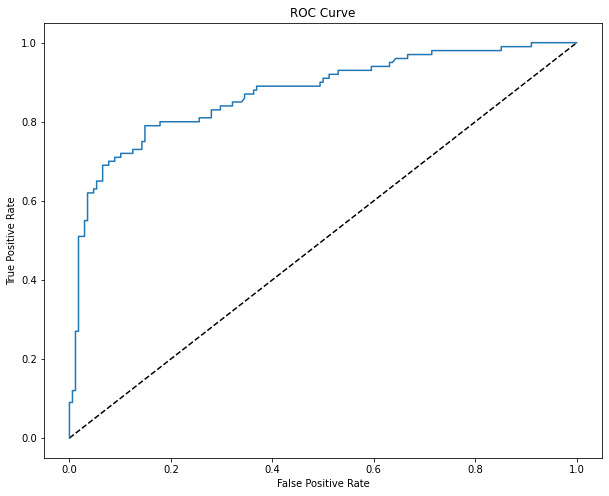

In [36]:

from sklearn.metrics import roc_curve
plt.figure(figsize=(10, 8))
# Compute predicted probabilities: y_pred_prob
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

